In [1]:
from pyautoml import Clean, Preprocess, Feature
import pandas as pd

train_data = pd.read_csv('data/train.csv') 

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

In [3]:
# clean.data_report(title='Titanic Summary', output_file='titanic_summary.html')

## Cleaning

In [4]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,580,712,712,NaN,712,NaN,NaN
mean,446.862,0.398876,2.30337,NaN,NaN,29.0241,0.530899,0.391854,NaN,33.0816,NaN,NaN
std,257.06,0.490011,0.840661,NaN,NaN,14.7839,1.0774,0.800556,NaN,52.1151,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,219.75,0,2,NaN,NaN,19.75,0,0,NaN,7.8958,NaN,NaN
50%,449.5,0,3,NaN,NaN,28,0,0,NaN,14.4583,NaN,NaN
75%,667.25,1,3,NaN,NaN,36.625,1,0,NaN,31.3875,NaN,NaN
max,890,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,580,712,712,712,712,167,710
uniques,712,2,3,712,2,85,7,7,563,229,122,3


In [5]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,580,712,712,712,712,167,710
uniques,712,2,3,712,2,85,7,7,563,229,122,3
missing,0,0,0,0,0,132,0,0,0,0,545,2
missing_perc,0%,0%,0%,0%,0%,18.54%,0%,0%,0%,0%,76.54%,0.28%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        33.0816
std                         52.1151
variance                    2715.98
min                               0
max                         512.329
mode                           8.05
5%                          7.18752
25%                          7.8958
50%                         14.4583
75%                         31.3875
95%                         113.275
iqr                         23.4917
kurtosis                    33.3808
skewness                    4.85209
sum                         23554.1
mad                         29.3043
cv                          1.57535
zeros_num                        12
zeros_perc                    1.69%
deviating_of_mean                17
deviating_of_mean_perc        2.39%
deviating_of_median              43
deviating_of_median_perc      6.04%
top_correlations                   
counts                          712
uniques                         229
missing                           0
missing_perc                

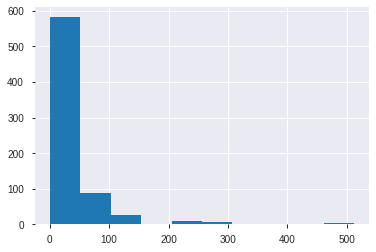

In [6]:
clean.describe_column('Fare')

33.08164747191012

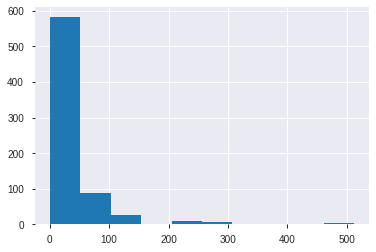

In [7]:
clean.describe_column('Fare')['mean']

In [8]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,545.000000,132.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.765449,0.185393,0.002809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,142.000000,45.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.793296,0.251397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [10]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,NaN,27.75,S
1,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,NaN,7.775,S
2,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,NaN,26.25,S
3,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,C50,83.1583,C
4,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,NaN,6.2375,S
5,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,NaN,8.6625,S
6,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,NaN,10.5,S
7,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,NaN,9.225,S
8,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,NaN,12.475,S
9,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,C101,51.4792,S


In [11]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,545.000000,132.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.765449,0.185393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,142.000000,45.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.793296,0.251397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


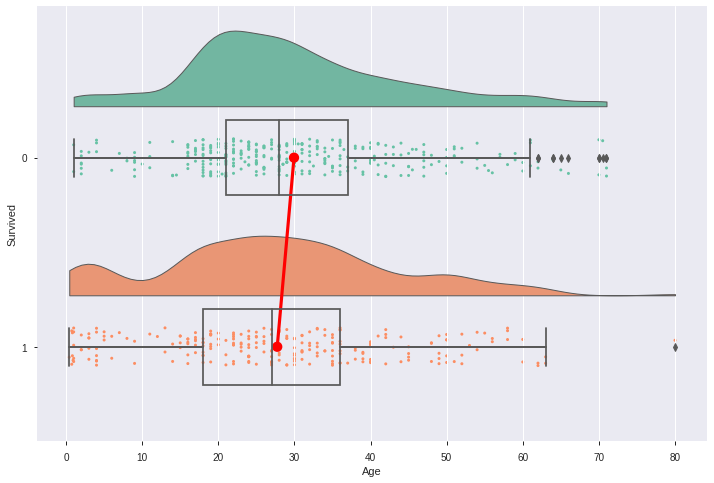

In [12]:
clean.visualize_raincloud('Age')

In [13]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,545.000000,132.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.765449,0.185393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,142.000000,45.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.793296,0.251397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,NaN,27.75,S
1,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,NaN,7.775,S
2,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,NaN,26.25,S
3,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,C50,83.1583,C
4,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,NaN,6.2375,S
5,159,0,3,"Smiljanic, Mr. Mile",male,27.0,0,0,315037,NaN,8.6625,S
6,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,NaN,10.5,S
7,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,NaN,9.225,S
8,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,NaN,12.475,S
9,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,C101,51.4792,S


In [15]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,545.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.765449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,142.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.793296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,545.000000,132.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.765449,0.185393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,142.000000,45.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.793296,0.251397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean', xlabel='Age')

In [18]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.75,S
1,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.775,S
2,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.25,S
3,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
4,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S
5,159,0,3,"Smiljanic, Mr. Mile",male,27.0,0,0,315037,8.6625,S
6,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5,S
7,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.225,S
8,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.475,S
9,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,S


In [19]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
counts,712,712,712,712,712,712,712,712,712,712,712
uniques,712,2,3,712,2,85,7,7,563,229,3
missing,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,categorical,categorical


In [28]:
clean.visualize_scatterplot('Age', 'Fare', fill_color='yellow')

## Feature Engineering

In [ ]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [ ]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

In [ ]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [ ]:
feature

In [ ]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

In [ ]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

In [ ]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex')

In [ ]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass')

## Modelling